Without Gaussian Noise

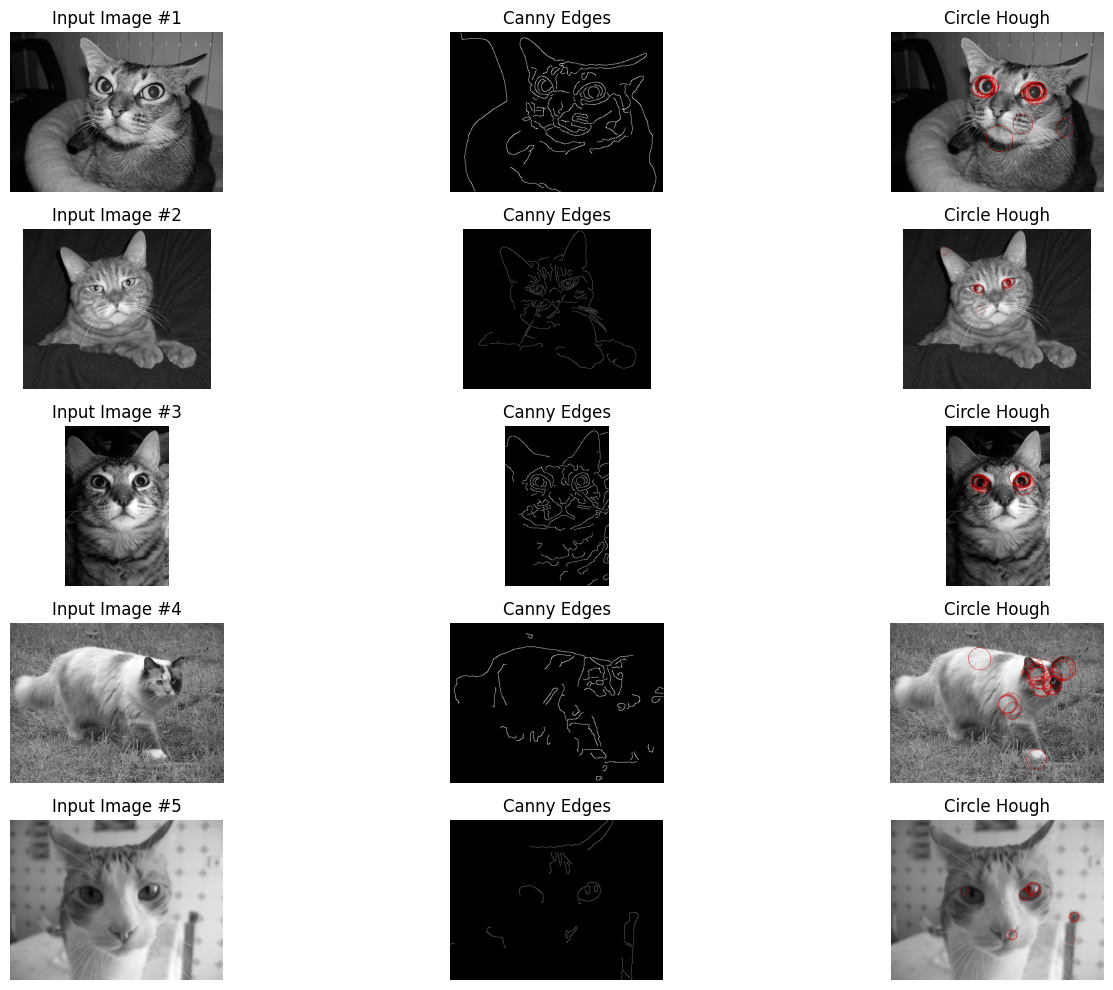

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage import io
from matplotlib import cm
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from skimage.color import rgb2gray

path = './data'
images_names = os.listdir(path)
images = []
edges = []
circled_images = []

for name in images_names:
    image = io.imread(path+'/'+name)
    image = rgb2gray(image)
    image = img_as_ubyte(image)

    edge = canny(image, 3, 20, 50)

    hough_radii = np.arange(20, 35, 1)
    hough_res = hough_circle(edge, hough_radii)

    accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=30)
    circled_image = color.gray2rgb(image)

    for center_y, center_x, radius in zip(cy, cx, radii):
        circy, circx = circle_perimeter(center_y, center_x, radius,shape=circled_image.shape)
        circled_image[circy, circx] = (200, 0, 0)
        
    images.append(image)
    edges.append(edge)
    circled_images.append(circled_image)


fig, ax = plt.subplots(len(images_names), 3, figsize=(15, 10), sharex=False, sharey=False, squeeze=False)

for i in range(len(images_names)):
    ax[i][0].imshow(images[i], cmap=cm.gray)
    ax[i][0].set_title('Input Image #'+str(i+1))

    ax[i][1].imshow(edges[i], cmap=cm.gray)
    ax[i][1].set_title('Canny Edges')

    ax[i][2].imshow(circled_images[i], cmap=cm.gray)
    ax[i][2].set_title('Circle Hough')

    ax[i][0].set_axis_off()
    ax[i][1].set_axis_off()
    ax[i][2].set_axis_off()

plt.tight_layout()
plt.show()

With Gaussian Noise

C:\Users\rkbij\AppData\Local\Temp\ipykernel_1916\3267570239.py:23: FutureWarning: `seed` is a deprecated argument name for `random_noise`. It will be removed in version 0.23. Please use `rng` instead.
  image = random_noise(image, mode='gaussian', seed=25, clip=True)


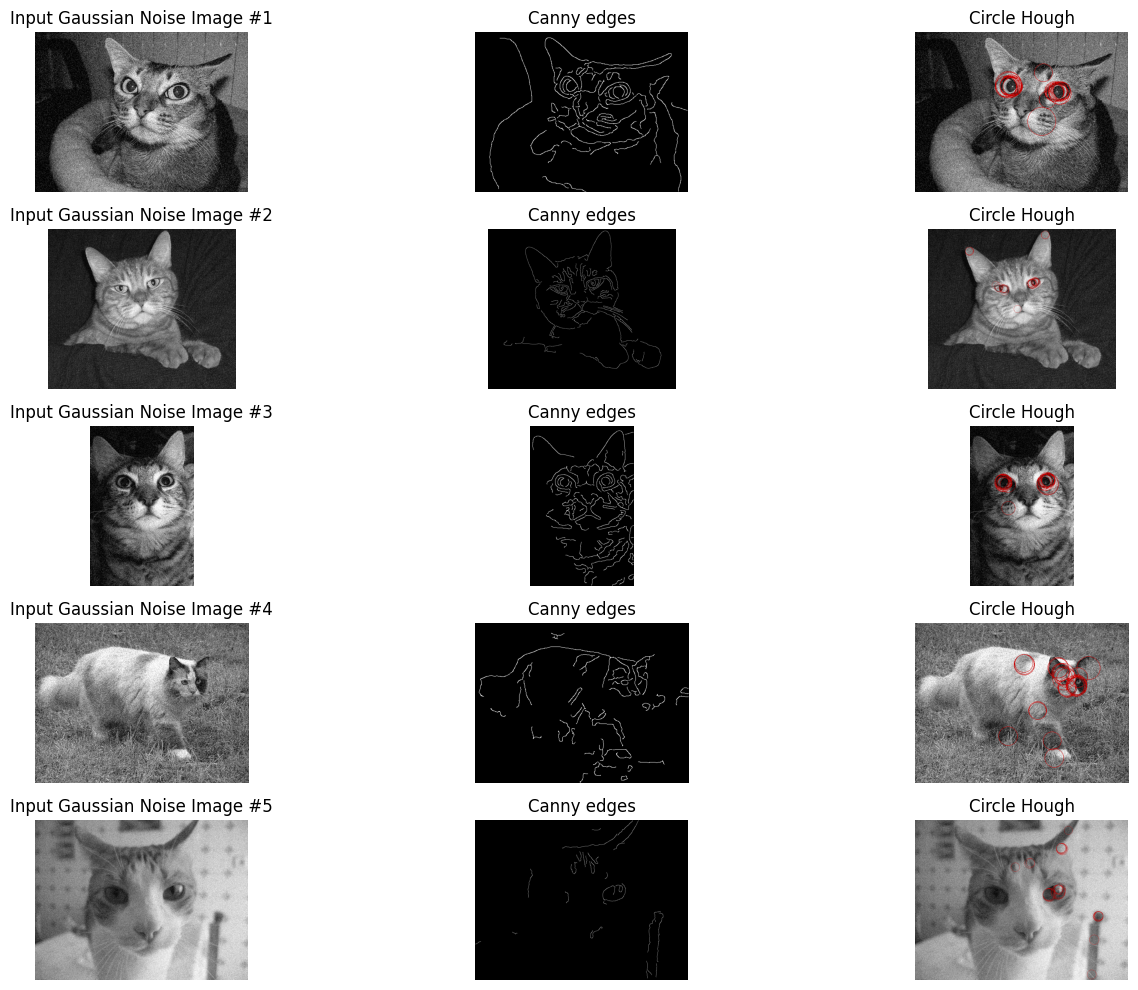

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage import io
from matplotlib import cm
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from skimage.color import rgb2gray
from skimage.util import random_noise

path = './data'
images_names = os.listdir(path)
images = []
edges = []
circled_images = []

for name in images_names:
    image = io.imread(path+'/'+name)
    image = rgb2gray(image)
    image = random_noise(image, mode='gaussian', seed=25, clip=True)

    image = img_as_ubyte(image)
    edge = canny(image, 3, 20, 50)

    hough_radii = np.arange(20, 35, 1)
    hough_res = hough_circle(edge, hough_radii)

    accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=30)
    circled_image = color.gray2rgb(image)

    for center_y, center_x, radius in zip(cy, cx, radii):
        circy, circx = circle_perimeter(center_y, center_x, radius,shape=circled_image.shape)
        circled_image[circy, circx] = (200, 0, 0)
    images.append(image)
    edges.append(edge)
    circled_images.append(circled_image)


fig, ax = plt.subplots(len(images_names), 3, figsize=(15, 10), sharex=False, sharey=False, squeeze=False)

for i in range(len(images_names)):
    ax[i][0].imshow(images[i], cmap=cm.gray)
    ax[i][0].set_title('Input Gaussian Noise Image #'+str(i+1))

    ax[i][1].imshow(edges[i], cmap=cm.gray)
    ax[i][1].set_title('Canny edges')

    ax[i][2].imshow(circled_images[i], cmap=cm.gray)
    ax[i][2].set_title('Circle Hough')

    ax[i][0].set_axis_off()
    ax[i][1].set_axis_off()
    ax[i][2].set_axis_off()

plt.tight_layout()
plt.show()